# Statistical Learning 

## Types of Statistics

1. Descriptive
2. Inferential 

Two main statistical methods are used in **data analysis**: **descriptive statistics**, which summarize data from a sample using indexes such as the mean or standard deviation, and **inferential statistics**, which draw conclusions from data that are subject to random variation (e.g., observational errors, sampling variation).


Descriptive statistics are most often concerned with two sets of properties of a distribution (sample or population): central tendency (or location) seeks to characterize the distribution's central or typical value, while dispersion (or variability) characterizes the extent to which members of the distribution depart from its center and each other. 


Inferences on mathematical statistics are made under the framework of probability theory, which deals with the analysis of random phenomena.



- Population 
- Sample, 
- mean, 
- median
- mode
- Skewness
- Central limit theorem


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Population

In [15]:
data = np.random.rand(1000)

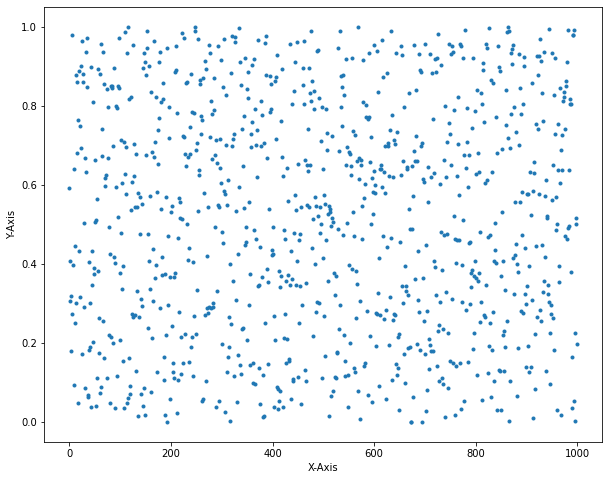

In [16]:
plt.figure(figsize=(10,8))
plt.plot(data, '.')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

plt.show()

### Permutation  

- Shuffling

### Sampling

- In statistics, quality assurance, and survey methodology, sampling is the selection of a subset (a statistical sample) of individuals from within a statistical population to estimate characteristics of the whole population. Statisticians attempt for the samples to represent the population in question. Two advantages of sampling are lower cost and faster data collection than measuring the entire population.

In [17]:
permutation = np.random.permutation(data)
permutation.shape

sample = permutation[:500]

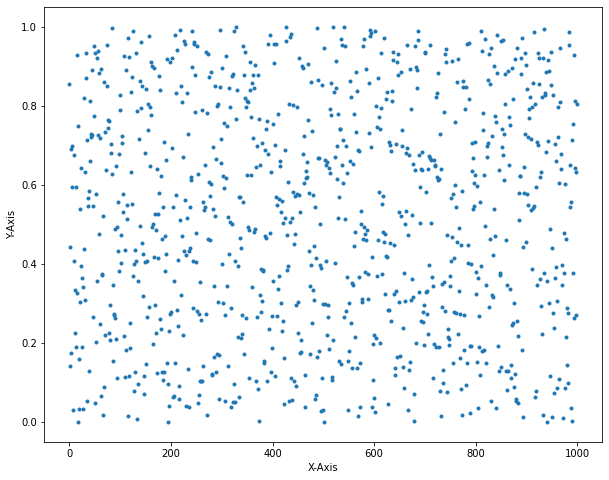

In [18]:
plt.figure(figsize=(10,8))
plt.plot(permutation, '.')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

plt.show()

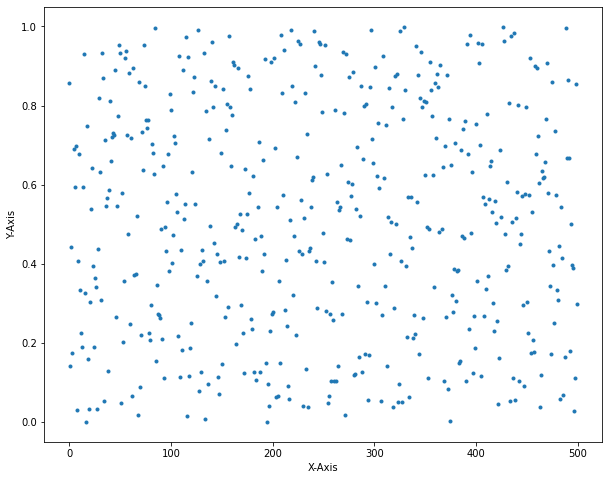

In [19]:
plt.figure(figsize=(10,8))
plt.plot(sample, '.')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

plt.show()

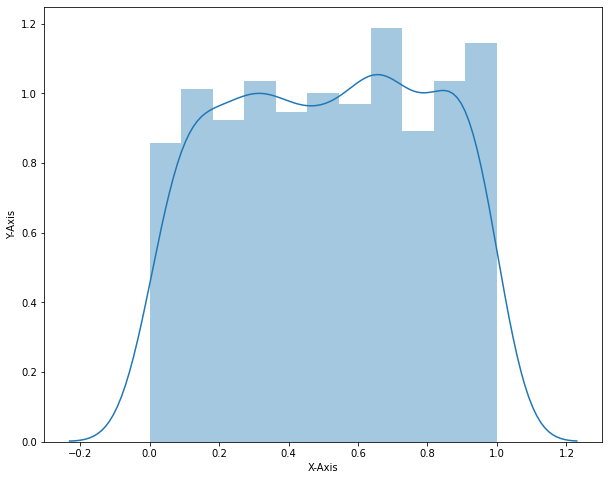

In [20]:
plt.figure(figsize=(10,8))
sns.distplot(permutation)
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

plt.show()

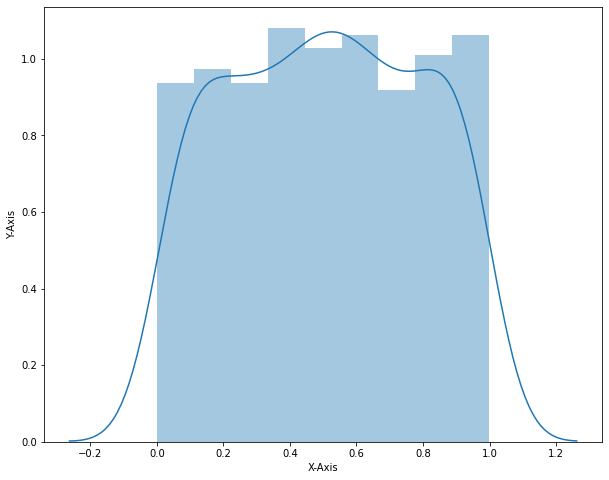

In [21]:
plt.figure(figsize=(10,8))
sns.distplot(sample)
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

plt.show()

## Central Limit Theorem

In [38]:
def toss(n,m):
    '''
    toss n coins simultaneously. Compute the sum.
    Repeat m times
    '''
    s = np.random.random_integers(0,1,(n,m))
    return np.sum(s,axis=0)

def main(n,m):
    sums = toss(n,m)

#   compute the histogram
    h = np.histogram(sums, bins=range(0,n+2))
    val =h[1][:-1] # removes the last point

#   theoretical results: Gaussian distribution
    miu = n*0.5 # theoretical mean
    sigma = np.sqrt(n*0.5*0.5) # theoretical standard deviation
    x = np.linspace(0,n,5000)
    y = 1.0/(sigma*np.sqrt(2*np.pi))*np.exp(-1.0*(x-miu)**2/(2.0*sigma**2))

#   plot the results
    plt.figure(figsize=(10, 8))
    bar1 = plt.bar(val,h[0]/(m*1.0))
    plt.xlim(miu-3*sigma,miu+3*sigma)
    xpos = [miu-3*sigma,miu-2*sigma,miu-sigma,miu,miu+sigma,miu+2*sigma,miu+3*sigma]
    plt.xticks(xpos,[r'$\mu-3\sigma$',r'$\mu-2\sigma$',r'$\mu-\sigma$',r'$\mu$',r'$\mu+\sigma$',r'$\mu+2\sigma$',r'$\mu+3\sigma$'])
    plt.title(r'Calculated average = %.2f, $\mu$ = %.2f, Calculated stdev = %.2f, $\sigma$ = %.2f' %(np.average(sums),miu,np.std(sums),sigma),{'fontsize':14})
    plt.xlabel('Sums',{'fontsize':14})
    plt.ylabel('Probability',{'fontsize':14})
    plt.tick_params(axis='both',labelsize=14)
    line1, = plt.plot(x,y,'r--',linewidth=3.0)
    plt.legend([line1,bar1],['Theory','Simulation'],fontsize=14)
    plt.show()


In [39]:
from ipywidgets import interactive

In [40]:
interactive_plot = interactive(main, n=(1,1000), m=(10, 10000))

output = interactive_plot.children[0]
interactive_plot

interactive(children=(IntSlider(value=500, description='n', max=1000, min=1), IntSlider(value=5005, descriptio…